# Principal
Principal Components Analysis (PCA) example

Example of using TPrincipal as a stand alone class.

We create n-dimensional data points, where c = trunc(n / 5) + 1
are  correlated with the rest n - c randomly distributed variables.




**Author:**  Rene Brun, Christian Holm Christensen  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:12 AM.</small></i>

In [1]:
%%cpp -d
#include "TPrincipal.h"

 Arguments are defined. 

In [2]:
Int_t n=10;
Int_t m=10000;

In [3]:
Int_t c = n / 5 + 1;

cout << "*************************************************" << endl;
cout << "*         Principal Component Analysis          *" << endl;
cout << "*                                               *" << endl;
cout << "*  Number of variables:           " << setw(4) << n
    << "          *" << endl;
cout << "*  Number of data points:         " << setw(8) << m
    << "      *" << endl;
cout << "*  Number of dependent variables: " << setw(4) << c
    << "          *" << endl;
cout << "*                                               *" << endl;
cout << "*************************************************" << endl;

*************************************************
*         Principal Component Analysis          *
*                                               *
*  Number of variables:             10          *
*  Number of data points:            10000      *
*  Number of dependent variables:    3          *
*                                               *
*************************************************


Initilase the tprincipal object. use the empty string for the
 final argument, if you don't wan't the covariance
 matrix. Normalising the covariance matrix is a good idea if your
 variables have different orders of magnitude.

In [4]:
TPrincipal* principal = new TPrincipal(n,"ND");

Use a pseudo-random number generator

In [5]:
TRandom* randumNum = new TRandom;

Make the m data-points
 Make a variable to hold our data
 Allocate memory for the data point

In [6]:
Double_t* data = new Double_t[n];
for (Int_t i = 0; i < m; i++) {

   // First we create the un-correlated, random variables, according
   // to one of three distributions
   for (Int_t j = 0; j < n - c; j++) {
      if (j % 3 == 0)      data[j] = randumNum->Gaus(5,1);
      else if (j % 3 == 1) data[j] = randumNum->Poisson(8);
      else                 data[j] = randumNum->Exp(2);
   }

   // Then we create the correlated variables
   for (Int_t j = 0 ; j < c; j++) {
      data[n - c + j] = 0;
      for (Int_t k = 0; k < n - c - j; k++) data[n - c + j] += data[k];
   }

   // Finally we're ready to add this datapoint to the PCA
   principal->AddRow(data);
}

We delete the data after use, since tprincipal got it by now.

In [7]:
delete [] data;

Do the actual analysis

In [8]:
principal->MakePrincipals();

Print out the result on

In [9]:
principal->Print();

 Variable #  | Mean Value |   Sigma    | Eigenvalue
-------------+------------+------------+------------
           0 |      5.008 |      1.005 |     0.3851 
           1 |      7.998 |      2.861 |     0.1107 
           2 |      1.967 |      1.956 |     0.1036 
           3 |      5.016 |      1.005 |     0.1015 
           4 |      8.009 |      2.839 |     0.1008 
           5 |      2.013 |      1.973 |    0.09962 
           6 |      4.992 |      1.014 |    0.09864 
           7 |         35 |      5.156 |  5.979e-16 
           8 |      30.01 |      5.049 |  2.525e-16 
           9 |         28 |      4.649 |  5.658e-16 



Test the pca

In [10]:
principal->Test();

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Make some histograms of the orginal, principal, residue, etc data

In [11]:
principal->MakeHistograms();

Make two functions to map between feature and pattern space

In [12]:
principal->MakeCode();

Writing on file "pca.C" ... done


Start a browser, so that we may browse the histograms generated
 above

In [13]:
TBrowser* b = new TBrowser("principalBrowser", principal);

Draw all canvases 

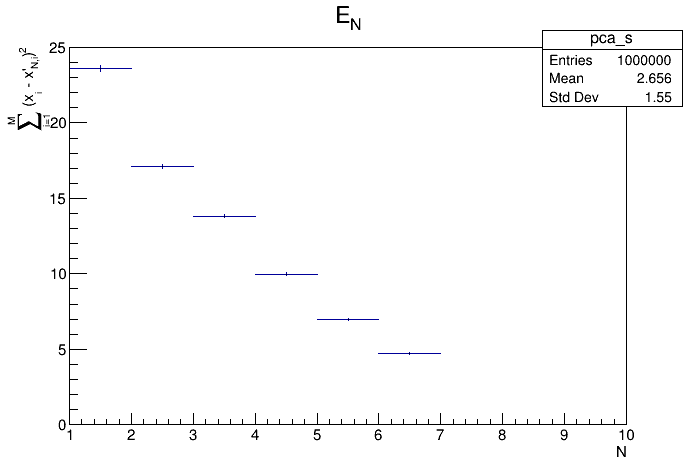

In [14]:
gROOT->GetListOfCanvases()->Draw()